# Introduction to Neural Network Classification

A classification is where you rey to classify something s one thing or another
A few type of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification


The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

### Creating data to view and fit

In [60]:
from sklearn.datasets import make_circles

# Make 1000 example
n_samples = 1000

#Cretre circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42
                    )

In [61]:
#Checkout the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [62]:
#Check the label
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Let's check the created circle data

In [63]:
import pandas as pd
circles = pd.DataFrame({"X0": x[:, 0], "X1": x[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


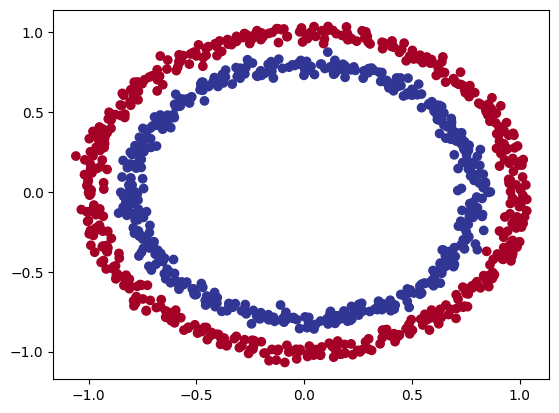

In [64]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [65]:
#Input and output shapes 

#chejc the shape of our features and labels

x.shape, y.shape

((1000, 2), (1000,))

In [66]:
#How many samples 
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [67]:
#Import tensorflow
import tensorflow as tf

### Steps in modeling
the steps in modelling with TensorFlow
* Create model
* Compile model
* Fit the model
* Evalute the model

In [68]:
#Set the random see
tf.random.set_seed(42)

#Crete the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#Fit the model

model_1.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 1.7343 - accuracy: 0.4960
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7270 - accuracy: 0.5001
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7042 - accuracy: 0.5003
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.4993
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4972


In [69]:
#Lets try and improve our model
model_1.fit(tf.expand_dims(x, axis=-1), y, epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934650540351868, 0.5]

#### Since we are working on a binary classification and model is getting around only 50%, so let's add another layer

In [70]:
#Set the random seeds
tf.random.set_seed(42)

#Create model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Complile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

#fit the model
model_2.fit(tf.expand_dims(x, axis=-1), y, epochs=100, verbose=0)

In [71]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932472586631775, 0.5]

### Improving the model

Let's look into how to improve model

In [72]:
#Set the random seeds
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

model_3.fit(tf.expand_dims(x, axis=-1), y, epochs=100, verbose=0)


In [73]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000


[0.69358229637146, 0.5]

#### To visualize model let's create the function
* Take in a trained model features (x) and labels (y)
* Create a meshgrid of the different x values
* Make preduction across the meshgrid
* Plot the prediction as well as a line between different zones

In [74]:
import numpy as np

In [75]:


def plot_decision_boundary (model, x, y):
    """
    Plots the decision boundary created by a model predicting on x
    1. https://cs231n.github.io/neural-networks-case-study/
    
    """

    #Desine the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max()+ 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max()+ 0.1

    #mashgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    #Create x value 
    x_in=np.c_[xx.ravel(), yy.ravel()] #Stack 2D arrays together

    #make prediction
    y_pred=model.predict(x_in)

    #check for multi-class
    if len(y_pred[0]) > 1 :
        print("doing multiclass classification")
        # we have to reshape our prediction to get then ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else: 
        print("doing binary classification")
        y_pred=np.round(y_pred).reshape(xx.shape)

    #Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


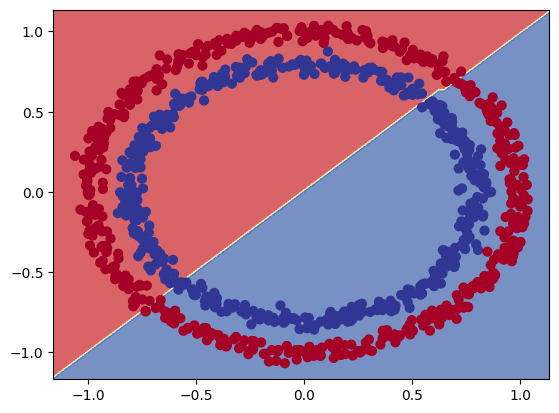

In [76]:
#check out the prediction our model iis making
plot_decision_boundary(model=model_3, x=x, y=y)



In [78]:
#Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

#Create regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

#Split our regression data into training and test data
x_reg_train=x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit the model 
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: -3795.4316 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

We compiled our model to binary classification model but we are using regression problem.
So let's change the model to suit

In [84]:
#Set random seed
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#compile the model 
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
)

#Fir the model

model_4.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 511.2881 - mae: 511.2881
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 409.6660 - mae: 409.6660
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 312.0262 - mae: 312.0262
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 210.7260 - mae: 210.7260
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 105.0964 - mae: 105.0964
Epoch 6/100
5/5 [==============================] - 0s 53ms/step - loss: 53.2291 - mae: 53.2291
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 77.8907 - mae: 77.8907
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 64.2118 - mae: 64.2118
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 44.9005 - mae: 44.9005
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 49.0403 - mae: 49.0403
Epoch 11/100
5/5 [=============================

5/5 [==============================] - 0s 2ms/step


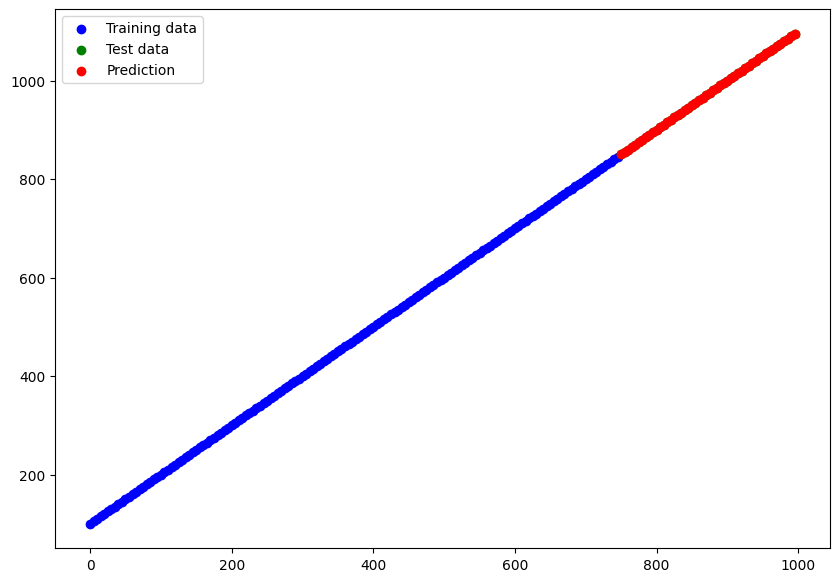

In [86]:
#Make predictions without trained model
y_reg_preds = model_4.predict(x_reg_train)

#Plot the model prediction agarinse our regression
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_test, c="r", label="Prediction")
plt.legend()

### The missing piece: Non-linearity

In [88]:
#Set the random seed
tf.random.set_seed(42)

#Create the model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
                )


#fit the model 
model_5.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 5.5179 - accuracy: 0.5016
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4479 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4040 - accuracy: 0.5003
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3499 - accuracy: 0.5005
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2274 - accuracy: 0.4997
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1579 - accuracy: 0.5001
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1537 - accuracy: 0.4997
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1481 - accuracy: 0.5003
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1476 - accuracy: 0.4981
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1550 - accuracy: 0.4986
Epoch 11/

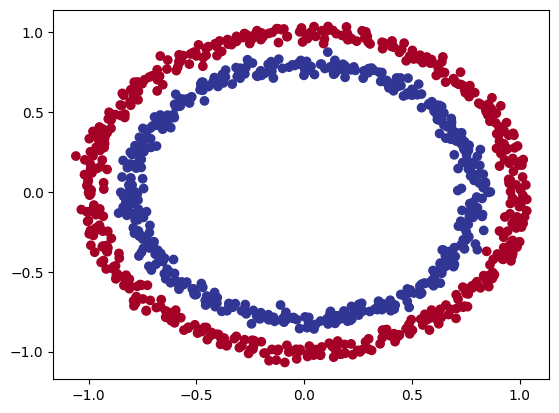

In [89]:
#check out our data

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing multiclass classification


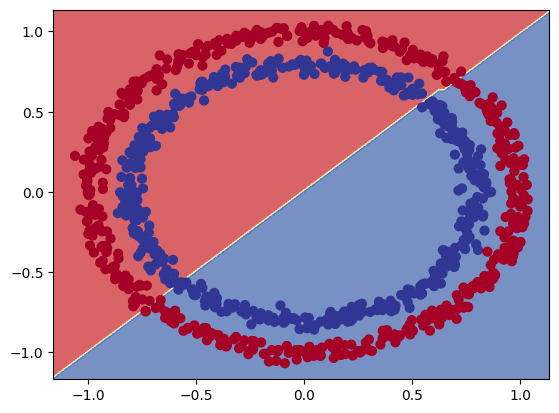

In [90]:
#Check the decision boundary for our data

plot_decision_boundary(model=model_5, x=x, y=y)

#### Let's try to build non-liner neural network here 

In [91]:
#set the random
tf.random.set_seed(42)

#Create a model with a non-liner
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=-.001),
metrics=["accuracy"])

#Fit the model

model_6.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 6.0992 - accuracy: 0.5018
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1674 - accuracy: 0.5003
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 6.1556 - accuracy: 0.5008
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1912 - accuracy: 0.4999
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2172 - accuracy: 0.4994
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1930 - accuracy: 0.5002
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2138 - accuracy: 0.4996
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2062 - accuracy: 0.4993
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2293 - accuracy: 0.4988
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2494 - accuracy: 0.4986
Epoch 11/

In [103]:
# Time to replicate the multilayer

#set the random seeds
tf.random.set_seed(42)

#Create the model
model_7= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile model
model_7.compile(loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

#fit the model
model_7.fit(tf.expand_dims(x, axis=-1), y, epochs=300)



Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 4.2973 - accuracy: 0.5000
Epoch 2/300
32/32 [==============================] - 0s 3ms/step - loss: 4.0975 - accuracy: 0.5000
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 3.7539 - accuracy: 0.5000
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 2.3879 - accuracy: 0.4974
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.8760 - accuracy: 0.4983
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.8360 - accuracy: 0.5011
Epoch 7/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7982 - accuracy: 0.4988
Epoch 8/300
32/32 [==============================] - 0s 3ms/step - loss: 0.7474 - accuracy: 0.5004
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.4984
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.4984
Epoch 11/

In [104]:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5021


[0.6932504177093506, 0.5020624995231628]

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


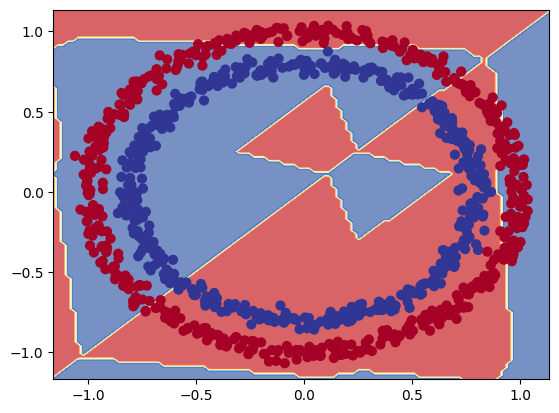

In [105]:
# How do our model prediction looks like

plot_decision_boundary(model_7, x, y)

In [129]:
#Set the random seeds
tf.random.set_seed(42)

#Create the model
model_8=tf.keras.Sequential([
    tf.keras.layers.Flatten(),  #Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. 
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#model_8.add(tf.keras.layers.Flatten())

#Compile the model 
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

#Fit the model
model_8.fit(tf.expand_dims(x, axis=-1), y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 0.6985 - accuracy: 0.4900
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5140
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4990
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5140
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4950
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5660
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5420
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4840
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 11/

In [119]:
model_8.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 2, 4)              8         
                                                                 
 dense_86 (Dense)            (None, 2, 4)              20        
                                                                 
 dense_87 (Dense)            (None, 2, 1)              5         
                                                                 
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 1s 2ms/step
doing binary classification


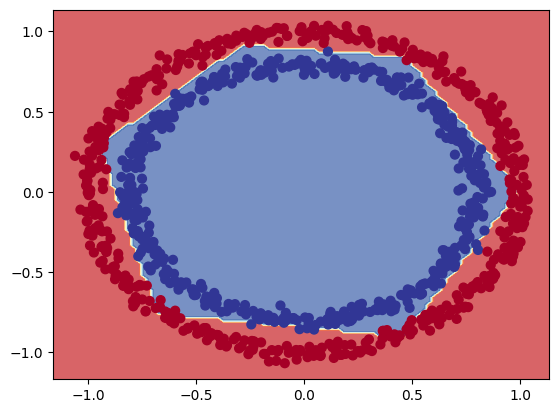

In [130]:
plot_decision_boundary(model_8, x, y)

**Note** The combination of ** linear and non-linear function ** is one of the key fundamental in neural networks.

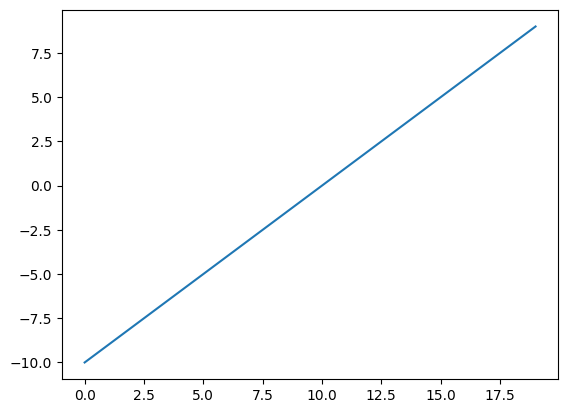

In [132]:
#Create a toy a tensor

A = tf.cast(tf.range(-10,10), tf.float32)

plt.plot(A)

In [133]:
# Replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
    return 1 / (1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

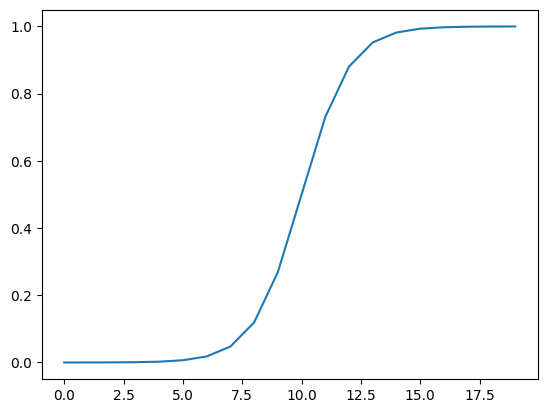

In [134]:
plt.plot(sigmoid(A))

In [137]:
#Recreate relu function

def relu(x):
    return tf.maximum(0, x)


relu(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

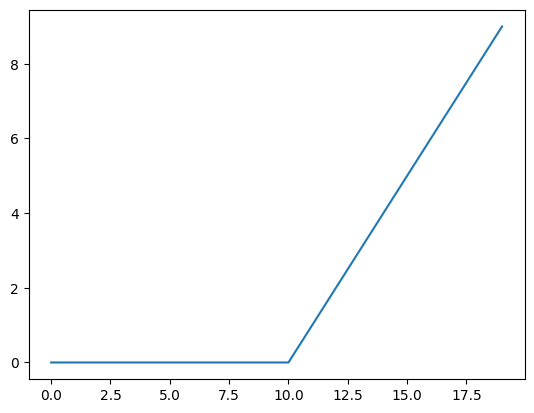

In [138]:
#Plot relu 
plt.plot(relu(A))

In [139]:
#Try the liner activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

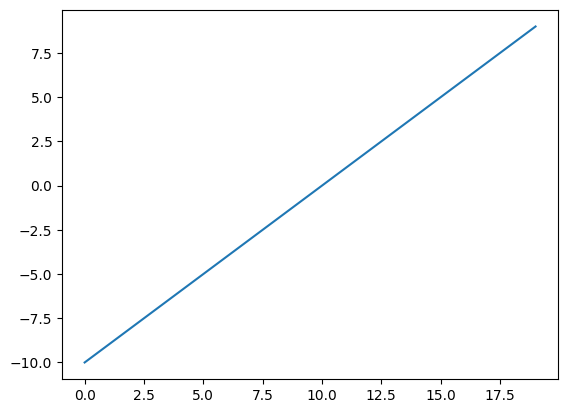

In [140]:
#plot the linear function
plt.plot(tf.keras.activations.linear(A))

In [141]:
#Let's look into Tanh activation function

def tanh(x):
    return (tf.exp(x)-tf.exp(-x)) / (tf.exp(x)+tf.exp(-x))

tanh(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)>

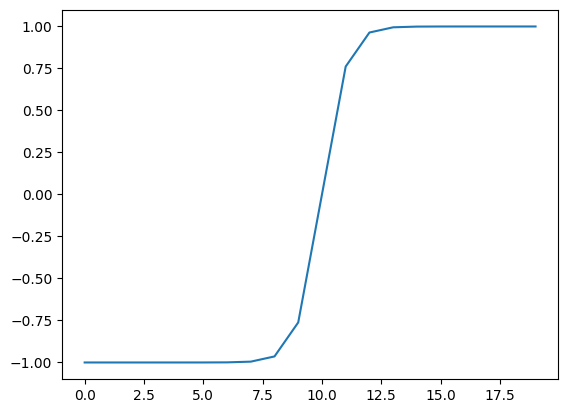

In [142]:
#Plot the tanh function 
plt.plot(tanh(A))

### Evaluate and improving classification

so far we have been training and testing on the same dataset
However and ML this is basically a sin
so let;s create a training and test data

In [143]:
#Check example
len(x)

1000

In [145]:
#Split into train and test sets
x_train, y_train  = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

x_train.shape, x_test.shape, y_train.shape,  y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [152]:
#Let's recreate a model to fit on the training data and evaluate on the testing data

#set random seed
tf.random.set_seed(42)

#Create the model 

model_9=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile the model 
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #Increase the learning rate
                metrics=["accuracy"]
            )

#fit the model
history = model_9.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=25) #and reduce the epochs

Epoch 1/25
25/25 [==============================] - 2s 2ms/step - loss: 0.6850 - accuracy: 0.5825
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5587
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.5775
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.6625
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.5987
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.6737
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7600
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7713
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.8138
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.8462
Epoch 11/25
25/25 [

In [153]:
#Evaluate the model on test data
model_9.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.9850


[0.08685625344514847, 0.9850000143051147]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


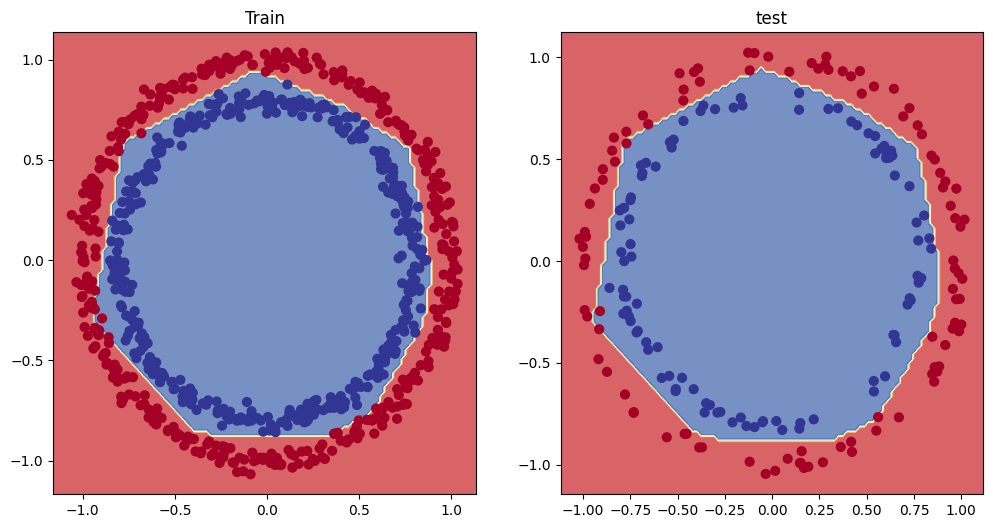

In [154]:
#Plot the decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, x=x_train, y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_9, x=x_test, y=y_test)

### Plot the loss (or training) curve

In [156]:
# Convert the history object into dataframe

pd.DataFrame(history.history)

,loss,accuracy
0,0.684992,0.58250
1,0.677292,0.55875
2,0.668346,0.57750
3,0.656968,0.66250
4,0.644336,0.59875
5,0.621285,0.67375
6,0.593745,0.76000
7,0.557165,0.77125
8,0.512627,0.81375
9,0.466966,0.84625


Text(0.5, 1.0, 'model_9 loss curves')

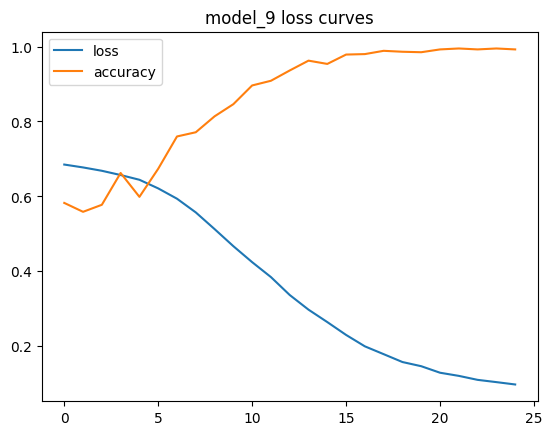

In [158]:
#Plot the loss conrves
pd.DataFrame(history.history).plot()
plt.title("model_9 loss curves")

**Note:** For many problems if loss function is going down meand model is improving.

## Finding the best learning rate
* Learning rate where the loss descrease the most during training.
Following the steps:

* A learning rate **callback** - Callback is an extra piece of functionality, which can be added during training.
* Another model (We could use the same one as above)
* A modified loass curve plot.

In [171]:
#Set random seed
tf.random.set_seed(42)

#Create the model 
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_11.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

#Create a leanring rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the model (passing lr_sheduler callback)
history_11 = model_11.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7125 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7121 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7117 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7112 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.4938 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7096 - accuracy: 0.4837 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7091 - accuracy: 0.4613 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

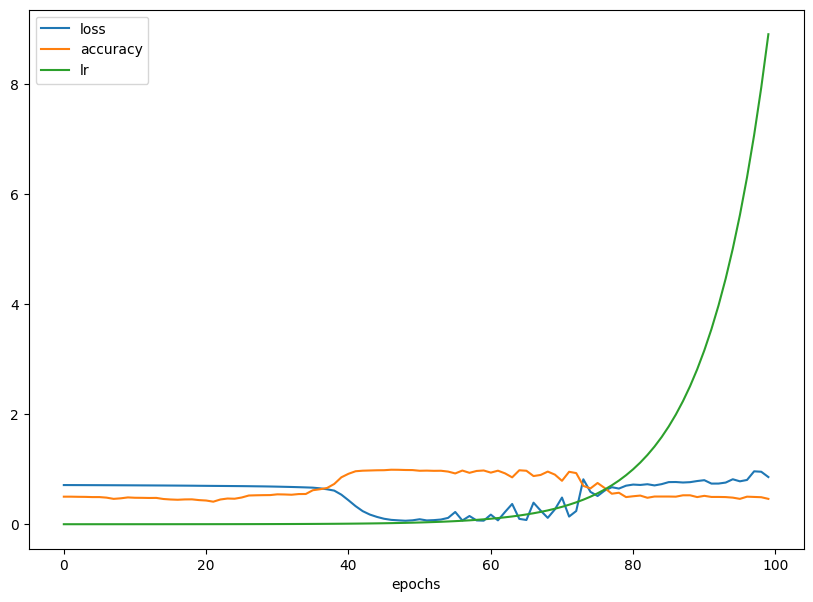

In [172]:
# checkout the history
pd.DataFrame(history_11.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Leaning rate vs. loss')

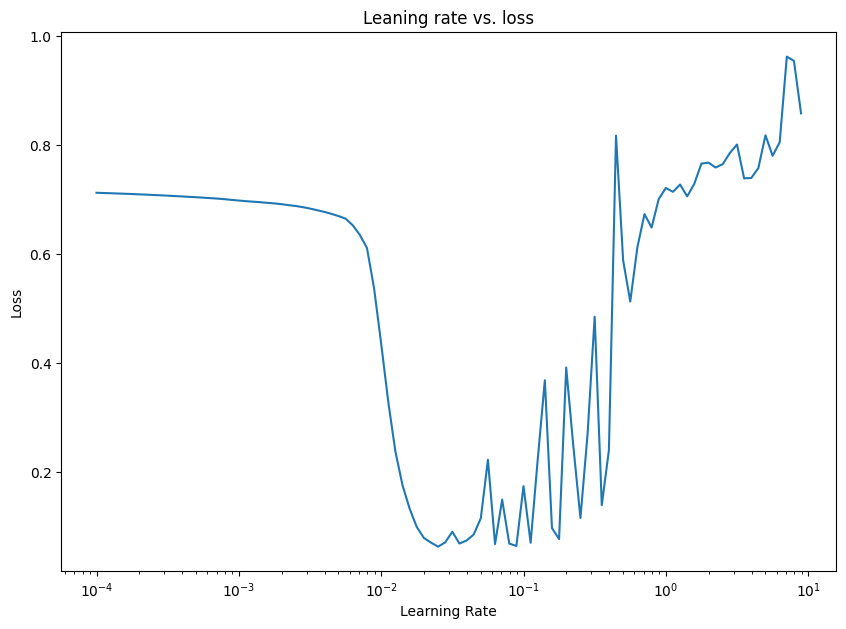

In [175]:
# Plot the learning rate versus the loss
lrs=1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_11.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Leaning rate vs. loss")


In [176]:
# Example of other typicla learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4


(1, 0.1, 0.01, 0.001, 0.0001)

In [183]:
# Let's try using a higher ideal leaning rate with the same model 

#set random seed
tf.random.set_seed(42)

#Create the model
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_12.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

#Fit the model
history_12=model_12.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5913
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6112
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.7375
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.8325
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.9388
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.9425
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9613
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.9875
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9925
Epoch 11/20
25/25 [

In [184]:
#Evaluate model on the test data
model_12.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9950


[0.04521019384264946, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


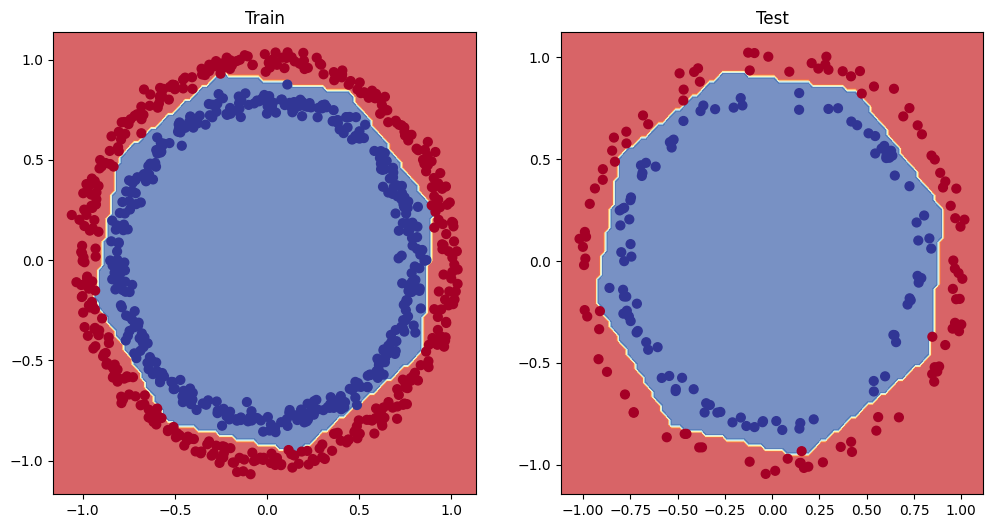

In [187]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1) #(row, column, position)
plt.title("Train")
plot_decision_boundary(model_12, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_12, x=x_test, y=y_test)
plt.show()


## More classification evaluabation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusuon matrix
* Classification report (from scikit-learn)

In [188]:
#Check the accurancy of the model
loss, accuracy = model_12.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100): .2f}%")


7/7 [==============================] - 0s 9ms/step - loss: 0.0452 - accuracy: 0.9950
Model loss on the test set: 0.04521019384264946
Model accuracy on the test set:  99.50%


### Confusion matrix

In [193]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#Make predictions
y_pred=model_12.predict(x_test)

#convert the pred variable 
y_pred_round=tf.round(y_pred)
#Create confusion matrix
confusion_matrix(y_test, y_pred_round)


7/7 [==============================] - 0s 2ms/step


array([[100,   1],
       [  0,  99]])

In [190]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [191]:
y_pred[:10]

array([[9.6456999e-01],
       [9.7496420e-01],
       [9.7496420e-01],
       [9.7496420e-01],
       [3.4733456e-01],
       [4.5938234e-04],
       [9.7496420e-01],
       [8.3094975e-03],
       [9.7496420e-01],
       [6.2364051e-03]], dtype=float32)

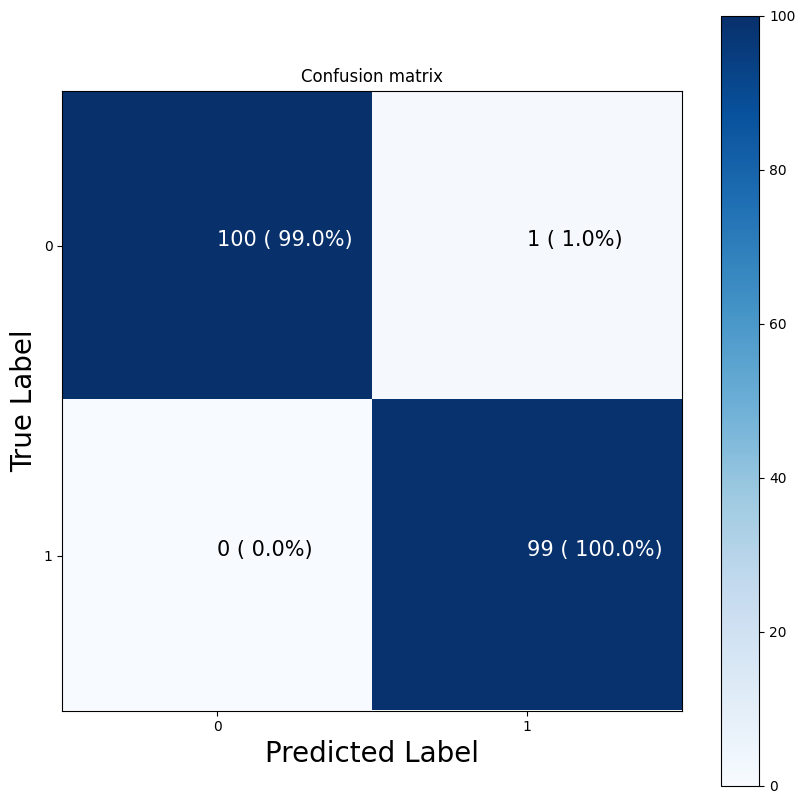

In [202]:
# Prettify the confusion matrix
import itertools
figsize=(10, 10)

#Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes=cm.shape[0]

#Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

#Create a matrix plot
cax=ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Crate classes
classes = False

if classes:
    labels=classes
else:
    labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title="Confusion matrix",
    xlabel="Predicted Label",
    ylabel="True Label",
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

#Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)

#Set threashold for different colors
threshold = (cm.max() + cm.min()) / 2

#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]* 100: .1f}%)",
    color="white" if cm[i,j] > threshold else "black",
    size=15)